In [2]:
# Military expenditure analysis by Junchi Tian

# Import the libraries
import os
import numpy
import pandas as pd
import matplotlib.pyplot as plt

#Set the working direction
os.chdir('C:\\Users\\lenovo\\Desktop\\Intro to Data Mining\\project1')
os.getcwd()

#Read the raw data
gdp_rawdata= pd.read_excel('API_NY.GDP.MKTP.CD_DS2_en_excel_v2_10080929.xls',sheet_name='Data')
military_rawdata= pd.read_excel('SIPRI-Milex-data-1949-2017.xlsx',sheet_name='Current USD')
population_rawdata1= pd.read_excel('WPP2017_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx',sheet_name='ESTIMATES')
population_rawdata2=pd.read_excel('WPP2017_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx',sheet_name='MEDIUM VARIANT')


In [3]:
#Extract useful data for the project
gdp=round(gdp_rawdata.iloc[[41,203,56,82,78,117,113,206,116,127],54:].T/1000000,0)
military=round(military_rawdata.iloc[[97,155,165,178,164,169,182,190,184,100],63:].T)
population1= round(population_rawdata1.iloc[[93,158,196,174,195,183,113,143,137,100],65:])
population2= round(population_rawdata2.iloc[[93,158,196,174,195,183,113,143,137,100],6:8])
population= pd.concat([population1,population2],axis=1).T


#Set the label of both x-axis and y-axis to GDP
country_list=['China', 'Russia', 'Germany', 'UK', 'France', 'Italy', 'Iran', 'Saudi Arabia', 'Israel', 'S. Korea']
year_list=[2010,2011,2012,2013,2014,2015,2016,2017]
gdp.index = year_list
gdp.columns = country_list


#Set the label of both x-axis and y-axis to military spending
military.index = year_list
military.columns = country_list

#Set the label of both x-axis and y-axis to population
population.index = year_list
population.columns = country_list

        China   Russia  Germany       UK   France    Italy     Iran  \
2010  1.89672  3.85072  1.35365   2.3793  2.33791  1.69559  2.78426   
2011  1.82194  3.42345  1.28111  2.30066  2.25766  1.67509   2.4469   
2012  1.83856  3.68597  1.31126  2.19736  2.23693  1.62738  2.75426   
2013  1.87235  3.84623  1.22399  2.07538   2.2204   1.5908  2.56671   
2014  1.91533  4.10418  1.18497  1.95786  2.23036   1.4673  2.27887   
2015  1.93493  4.85375  1.17942   1.8666  2.26979  1.38006   2.7441   
2016   1.9304  5.38988  1.19557  1.81523  2.32679  1.51695  2.92712   
2017  1.86498  4.20501  1.20544  1.79959  2.23698  1.51108  3.31003   

     Saudi Arabia   Israel S. Korea  
2010      8.56568  6.23826  2.57425  
2011      7.23005  6.23728  2.57735  
2012       7.6766  6.04192  2.61298  
2013      8.97613  5.91551  2.61462  
2014      10.6779  5.99225  2.66077  
2015      13.3257  5.67154  2.64476  
2016      9.87273  4.65236  2.61057  
2017      10.1507  4.69972  2.55773  


<function matplotlib.pyplot.show>

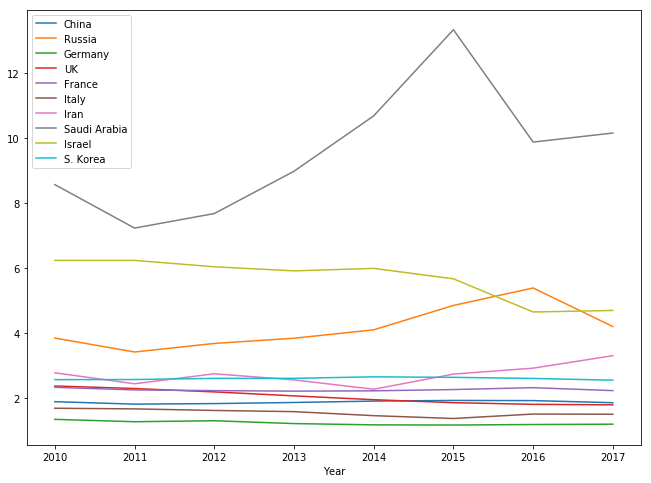

In [4]:
#1,compare the data to country's GDP
compare1=military/gdp*100
print (compare1)

#Visualization
plt.figure(figsize=(11,8))
plt.plot(compare1)
plt.legend(country_list)
plt.xlabel('Year')
plt.show

<function matplotlib.pyplot.show>

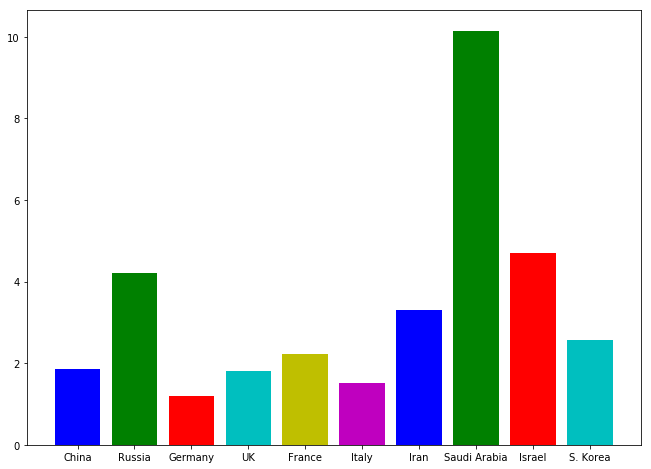

In [5]:
# Use a specific year-2017 to show the differences between differnent countries.
gdp_2017=compare1.iloc[-1,:]

#Visualization
plt.figure(figsize=(11,8))
plt.bar(range(len(gdp_2017)), gdp_2017, color='bgrcym',tick_label=country_list)
plt.show

         China    Russia    Germany         UK     France      Italy  \
2010  0.242005   0.12281  0.0967408   0.121477   0.129213  0.0753595   
2011  0.260579  0.132657  0.0909226   0.113833   0.122012   0.072016   
2012  0.282019  0.145981  0.0832687   0.104815   0.107574  0.0604439   
2013  0.300909  0.147799  0.0768338  0.0951198   0.104413  0.0566953   
2014  0.317358  0.133878  0.0728738  0.0935494   0.100553  0.0499061   
2015  0.353212  0.109578   0.065683  0.0888621  0.0913038  0.0417312   
2016  0.367279  0.117725  0.0706902   0.081808  0.0975163  0.0479534   
2017  0.372501  0.108267   0.072351  0.0770251  0.0942882  0.0477175   

           Iran Saudi Arabia     Israel   S. Korea  
2010  0.0283626    0.0946264   0.030479  0.0589268  
2011  0.0269662    0.0916603  0.0308208   0.058534  
2012  0.0295547     0.101236  0.0278555  0.0572527  
2013  0.0200692     0.112113  0.0289436  0.0571047  
2014  0.0156505      0.12766  0.0292128  0.0593584  
2015  0.0174694      0.14384   0.

<function matplotlib.pyplot.show>

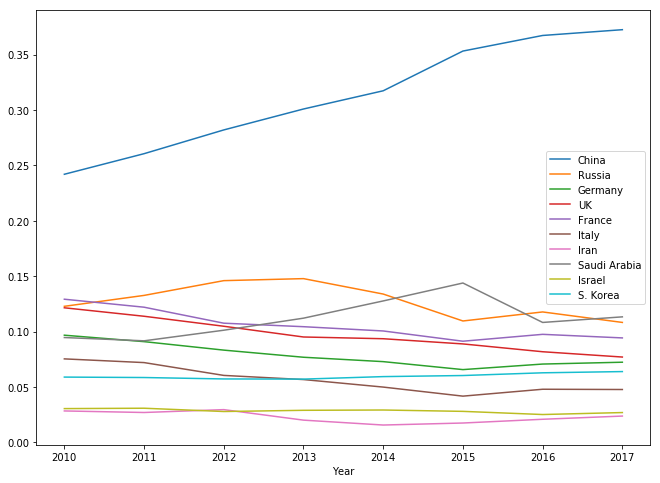

In [6]:
#2,Compare the data to the overall military spending of the all 10 countries
military_overall=[]
for i in range(8):
    military_overall.append(sum(military.iloc[i,:]))
      
compare2=military.T/military_overall
compare2=compare2.T
print(compare2)

#Visualization
plt.figure(figsize=(11,8))
plt.plot(compare2)
plt.legend(country_list)
plt.xlabel('Year')
plt.show

<function matplotlib.pyplot.show>

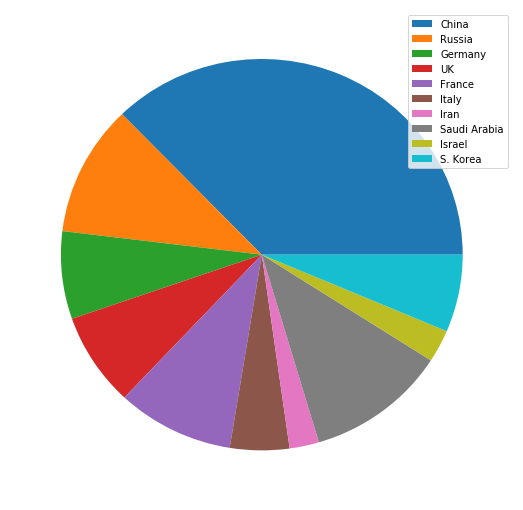

In [7]:
# Use a specific year-2017 to show the differences between differnent countries.
mili_2017=compare2.iloc[-1,:]

#Visualization
plt.figure(figsize=(9,9))
plt.pie(mili_2017)
plt.legend(country_list,loc= 'best')
plt.show

          China    Russia   Germany        UK    France     Italy      Iran  \
2010  0.0850975  0.410189  0.571797  0.917479  0.980243  0.603253  0.181865   
2011   0.100892  0.490266   0.59481    0.9445   1.01984  0.638052  0.189128   
2012   0.114449  0.568044  0.573247  0.910438  0.943356  0.564716  0.215737   
2013   0.130085  0.615284  0.565195  0.879655  0.976488  0.568008  0.154932   
2014   0.144429  0.589148  0.565746  0.910281  0.991004  0.529863  0.126272   
2015   0.153249    0.4616  0.487254  0.823619   0.85859  0.425091  0.133427   
2016   0.153923  0.480987  0.507593  0.731413  0.886241  0.474606   0.15277   
2017   0.161921  0.460692   0.53985  0.713081  0.889045  0.492527  0.179245   

     Saudi Arabia   Israel  S. Korea  
2010      1.64969  1.96245  0.568587  
2011      1.71864  2.15597  0.623012  
2012      1.94244  2.01918  0.639649  
2013      2.23818  2.21228  0.680433  
2014      2.62412   2.3273  0.745293  
2015      2.76281  2.10331  0.722828  
2016      1.972

<function matplotlib.pyplot.show>

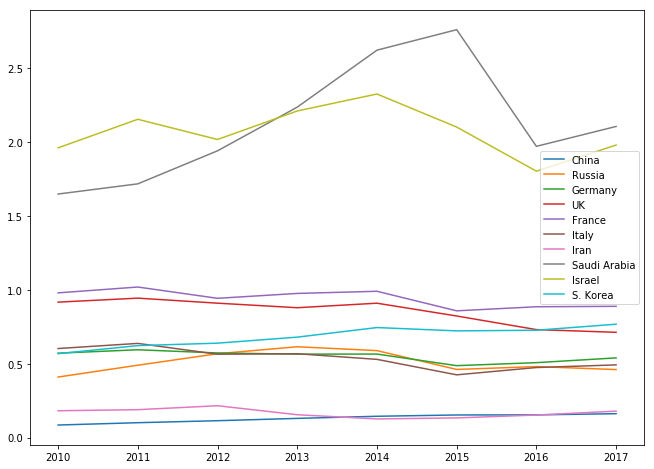

In [8]:
#3,Compare the per person military spending to the per person GDP
#per person military expenditure
per_mili = military/population
print(per_mili)

#Visualization
plt.figure(figsize=(11,8))
plt.plot(per_mili)
plt.legend(country_list,loc= 'best')
plt.show

         China     Russia    Germany         UK     France      Italy  \
2010  4.486558  10.652277  42.241115  38.560870  41.928221  35.577733   
2011  5.537598  14.320848  46.429165  41.053407  45.172518  38.090562   
2012  6.224951  15.410972  43.717267  41.433230  42.171983  34.700891   
2013  6.947695  15.997047  46.176263  42.385158  43.978066  35.705755   
2014  7.540678  14.354818  47.743367  46.493602  44.432491  36.111385   
2015  7.920141   9.510182  41.313103  44.123889  37.826892  30.802433   
2016  7.973632   8.923891  42.456156  40.293210  38.088627  31.286959   
2017  8.682194  10.955789  44.784556  39.624581  39.743013  32.594306   

          Iran  Saudi Arabia     Israel   S. Korea  
2010  6.531890     19.259352  31.458389  22.087442  
2011  7.729296     23.770770  34.565861  24.172560  
2012  7.832854     25.303411  33.419535  24.479640  
2013  6.036224     24.934778  37.397903  26.024138  
2014  5.540996     24.575170  38.838559  28.010439  
2015  4.862324     20.73

<function matplotlib.pyplot.show>

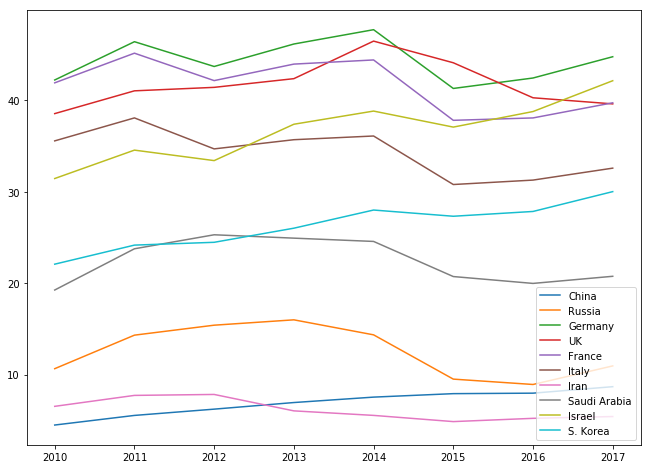

In [9]:
#per person GDP
per_gdp = gdp/population
print(per_gdp)

#Visualization
plt.figure(figsize=(11,8))
plt.plot(per_gdp)
plt.legend(country_list,loc= 'best')
plt.show

          China     Russia    Germany         UK     France      Italy  \
2010  0.0189672  0.0385072  0.0135365   0.023793  0.0233791  0.0169559   
2011  0.0182194  0.0342345  0.0128111  0.0230066  0.0225766  0.0167509   
2012  0.0183856  0.0368597  0.0131126  0.0219736  0.0223693  0.0162738   
2013  0.0187235  0.0384623  0.0122399  0.0207538   0.022204   0.015908   
2014  0.0191533  0.0410418  0.0118497  0.0195786  0.0223036   0.014673   
2015  0.0193493  0.0485375  0.0117942   0.018666  0.0226979  0.0138006   
2016   0.019304  0.0538988  0.0119557  0.0181523  0.0232679  0.0151695   
2017  0.0186498  0.0420501  0.0120544  0.0179959  0.0223698  0.0151108   

           Iran Saudi Arabia     Israel   S. Korea  
2010  0.0278426    0.0856568  0.0623826  0.0257425  
2011   0.024469    0.0723005  0.0623728  0.0257735  
2012  0.0275426     0.076766  0.0604192  0.0261298  
2013  0.0256671    0.0897613  0.0591551  0.0261462  
2014  0.0227887     0.106779  0.0599225  0.0266077  
2015   0.027441

<function matplotlib.pyplot.show>

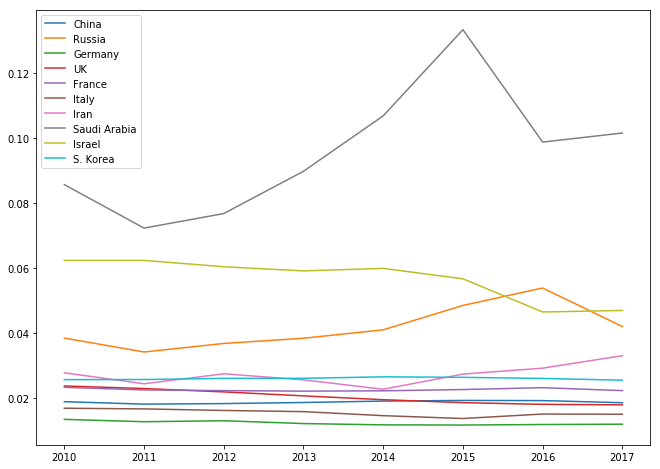

In [10]:
compare3=per_mili/per_gdp
print(compare3)
#Visualization

plt.figure(figsize=(11,8))
plt.plot(compare3)
plt.legend(country_list,loc= 'best')
plt.show 
plt.show

China           90263.4
Russia         -3902.54
Germany        -3811.07
UK             -13077.3
France          -6830.8
Italy           -8893.6
Iran            270.383
Saudi Arabia    20882.4
Israel          170.508
S. Korea        8160.79
dtype: object


<function matplotlib.pyplot.show>

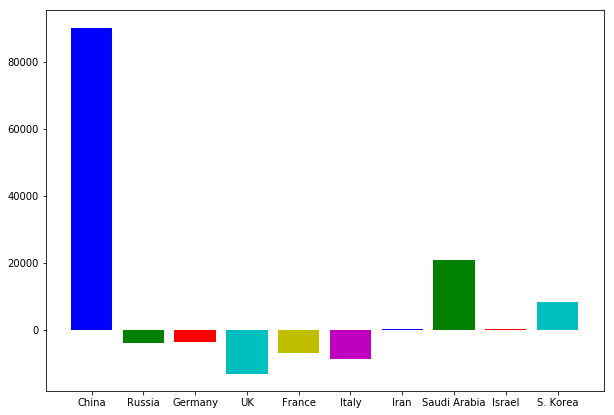

In [11]:
#4,Single out the fastest growing countries in military spending in fixed value
compare4=military.iloc[-1,:]-military.iloc[1,:]
print(compare4)

#Visualizaiton
plt.figure(figsize=(10,7))
plt.bar(range(len(compare4)),compare4,color='bgrcym',tick_label=country_list) 
plt.show

China            1.65424
Russia          0.944438
Germany         0.920834
UK              0.783022
France          0.894262
Italy           0.766756
Iran             1.01894
Saudi Arabia     1.43029
Israel           1.01045
S. Korea         1.26332
dtype: object


<function matplotlib.pyplot.show>

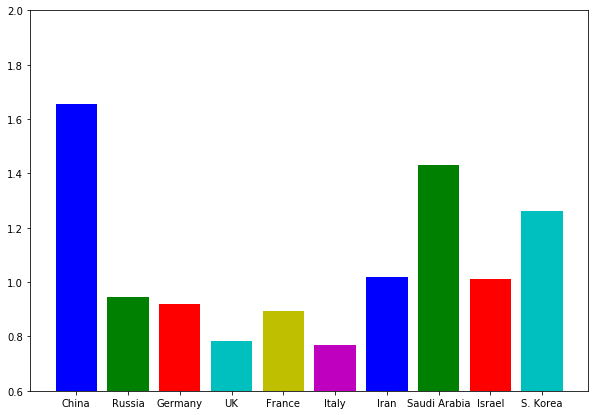

In [12]:
#5,Single out the fastest growing countries in military spending in percentage
compare5=military.iloc[-1,:]/military.iloc[1,:]
print(compare5)

#Visualization
plt.figure(figsize=(10,7))
plt.bar(range(len(compare5)),compare5,color='bgrcym',tick_label=country_list)
plt.ylim(0.6,2.0)  
plt.show